<a href="https://colab.research.google.com/github/gowthamana2024/DAA-Divide-and-conquer/blob/main/FOML_EXP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target name: House Value

--- UNIVARIATE REGRESSION (MedInc) ---
Coefficient: [0.41933849]
Intercept: 0.4445972916907879


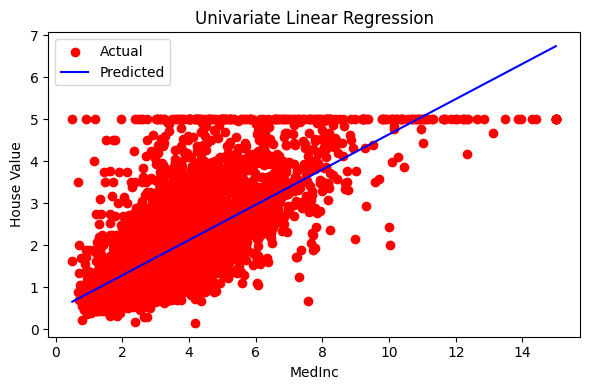


--- BIVARIATE REGRESSION (MedInc, HouseAge) ---
Coefficients: [0.43342284 0.01748574]
Intercept: -0.11029749287955903


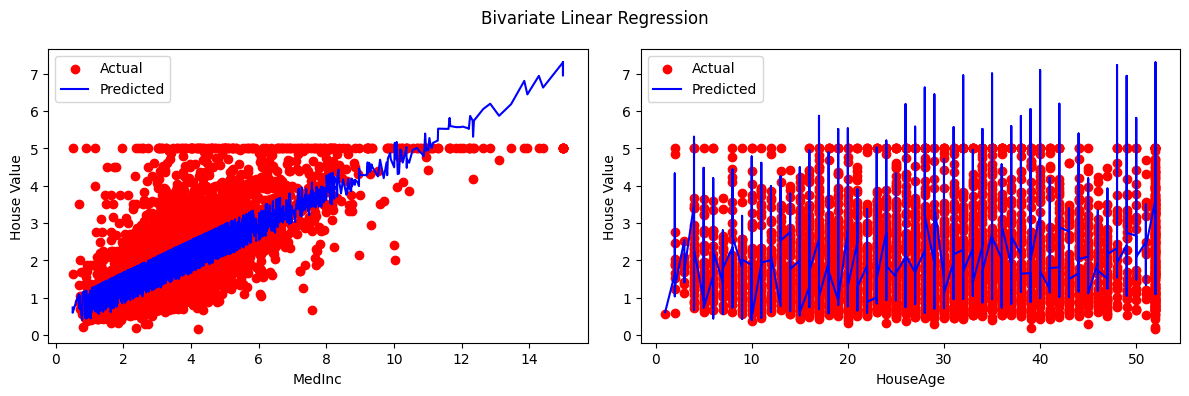


--- MULTIVARIATE REGRESSION (All features) ---
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02327770606391
R^2 score: 0.5757877060324524


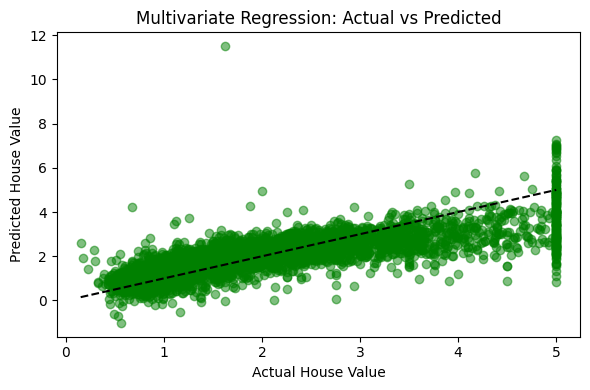

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = fetch_california_housing()
X_all = data.data
y = data.target
feature_names = data.feature_names

print("Feature names:", feature_names)
print("Target name: House Value")

# --- UNIVARIATE REGRESSION (MedInc) ---
print("\n--- UNIVARIATE REGRESSION (MedInc) ---")
X_uni = X_all[:, [0]]  # MedInc
X_train, X_test, y_train, y_test = train_test_split(X_uni, y, test_size=0.2, random_state=42)

model_uni = LinearRegression().fit(X_train, y_train)
print("Coefficient:", model_uni.coef_)
print("Intercept:", model_uni.intercept_)

y_pred = model_uni.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='red', label='Actual')
sorted_idx = np.argsort(X_test[:, 0])
plt.plot(X_test[sorted_idx], y_pred[sorted_idx], color='blue', label='Predicted')
plt.xlabel("MedInc")
plt.ylabel("House Value")
plt.title("Univariate Linear Regression")
plt.legend()
plt.tight_layout()
plt.show()

# --- BIVARIATE REGRESSION (MedInc, HouseAge) ---
print("\n--- BIVARIATE REGRESSION (MedInc, HouseAge) ---")
X_bi = X_all[:, [0, 1]]
X_train, X_test, y_train, y_test = train_test_split(X_bi, y, test_size=0.2, random_state=42)

model_bi = LinearRegression().fit(X_train, y_train)
print("Coefficients:", model_bi.coef_)
print("Intercept:", model_bi.intercept_)

y_pred = model_bi.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
features = ['MedInc', 'HouseAge']

for i in range(2):
    sorted_idx = np.argsort(X_test[:, i])
    X_sorted = X_test[sorted_idx, i]
    y_sorted = y_pred[sorted_idx]

    axes[i].scatter(X_test[:, i], y_test, color='red', label='Actual')
    axes[i].plot(X_sorted, y_sorted, color='blue', label='Predicted')
    axes[i].set_xlabel(features[i])
    axes[i].set_ylabel("House Value")
    axes[i].legend()

plt.suptitle("Bivariate Linear Regression")
plt.tight_layout()
plt.show()

# --- MULTIVARIATE REGRESSION (All features) ---
print("\n--- MULTIVARIATE REGRESSION (All features) ---")
X_multi = X_all
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression().fit(X_train, y_train)
print("Coefficients:", model_multi.coef_)
print("Intercept:", model_multi.intercept_)

y_pred = model_multi.predict(X_test)
score = model_multi.score(X_test, y_test)
print("R^2 score:", score)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='black', linestyle='--')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Multivariate Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()
